In [1]:
import matplotlib.pyplot as plt
from timescales.plts import set_default_rc
set_default_rc()

import numpy as np

from timescales.sim import sim_ar_spectrum, sim_exp_decay
from timescales.conversions import psd_to_acf, acf_to_psd

# 01. Timescales Introduction

Timescales refer the the time it takes for a process to complete and may be quanitfied using power spectral density (PSD), the autocorrelation function (ACF), or first-order autoregressive models, AR(1). The PSD form below comes from the theoretical AR(1)-PSD form. Timescales, $\tau$, are equal to inverse decay rate of the autocorrelation function (the lag where the correlation drops to $\frac{1}{e}$) and have equivalent power spectral density forms.

$$
\begin{align*}
ACF(k) &= e^{\frac{-k}{\tau f_s}} \\
PSD(f) &= \frac{\sigma^{2}}{|1 - \varphi e\strut^{-j 2 \pi \frac{f}{f_s}}|^{2}}
\end{align*}
$$

Variables descriptions:

- $\tau$: timescale, in seconds
- $\varphi$: first-order autoregressive coefficient
- $k$: integer lag step
- $f_s$: sampling rate of the signal, in Hertz
- $f$: frequency
- $\sigma^2$: white noise variance or the PSD scaling.
- $j$: imaginary unit


The equivalence of these ACF and PSD forms is through the connection between the AR(1) coefficient, $\varphi$, and the timescale, $\tau$. $\varphi$ is the correlation at lag one of the ACF:

$$
\begin{align*}
\varphi &= e^{\frac{-1}{\tau f_s}} \\
\tau &= -\frac{1}{\log(\varphi) f_s}
\end{align*}
$$

This tutorial descibes the basics of ACF and PSD models. Future tutorials will describe model assumptions, how to fit these models on simulated or real data, potential biases, and how to address bias. 

## ACF

In the ACF, timescales are defined as the inverse of the exponential decay rate.

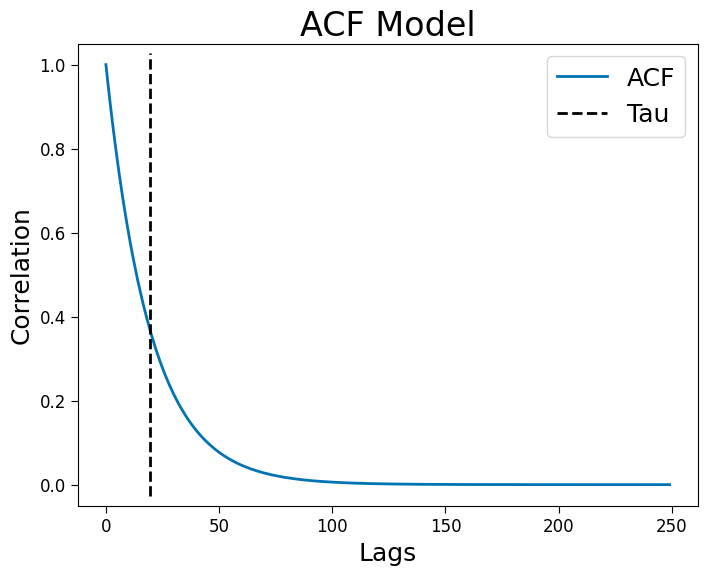

In [2]:
# Settings
fs = 2000
phi = 0.95
tau = -1 / (np.log(phi) * fs)

# Simulate ACF
lags = np.arange(2000)
corrs = sim_exp_decay(lags, fs, tau, 1)

# Plot
plt.figure(figsize=(8, 6))
plt.title('ACF Model')
plt.plot(lags[:250], corrs[:250], label='ACF')
plt.axvline(tau * fs, .02, .98, color='k', ls='--', label='Tau')
plt.xlabel('Lags')
plt.ylabel('Correlation')
plt.legend();

## PSD
In the PSD, timescales are defined as the transition from constant log-log power to linearly decaying log-log power. The complex exponential PSD form is the exact translation of an exponentially decaying ACF via the Wiener–Khinchin theorem. The approximate form is simpler, but less accurate translation at frequencies close to Nyquist and does not allow for increasing complexity as easily as AR(p) models.

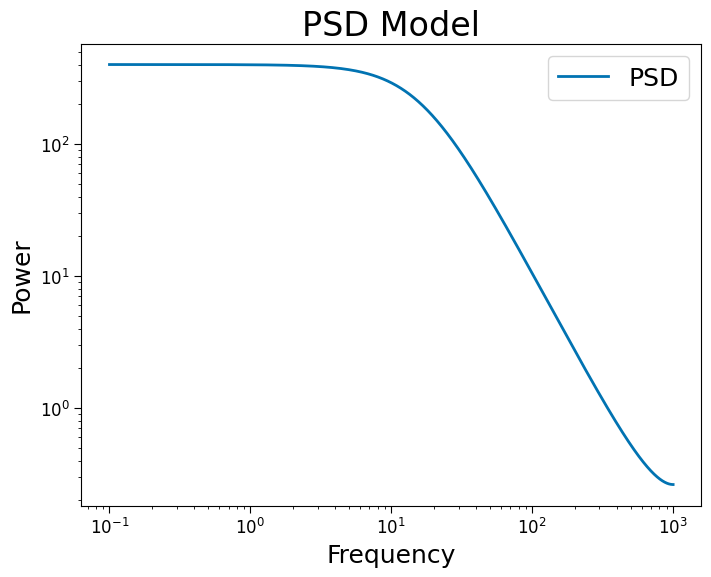

In [3]:
# Simulate PSD
freqs = np.linspace(1e-5, fs/2, 10_000)
powers = sim_ar_spectrum(freqs, fs, phi)

# Plot
plt.figure(figsize=(8, 6))
plt.title('PSD Model')
plt.loglog(freqs[1:], powers[1:], label='PSD')

plt.xlabel('Frequency')
plt.ylabel('Power')
plt.legend();

## Wiener–Khinchin Theorem

The Wiener–Khinchin Theorem descibes the relationship between the PSD and ACF uing the (inverse) Fourier transform. Below, this equivalence is demonstrated.

In [4]:
# ACF to PSD via Fourier transform
freqs_ifft, powers_ifft = acf_to_psd(corrs, fs)

# PSD to ACF via Fourier transform
lags_ifft, corrs_ifft = psd_to_acf(freqs, powers, fs)

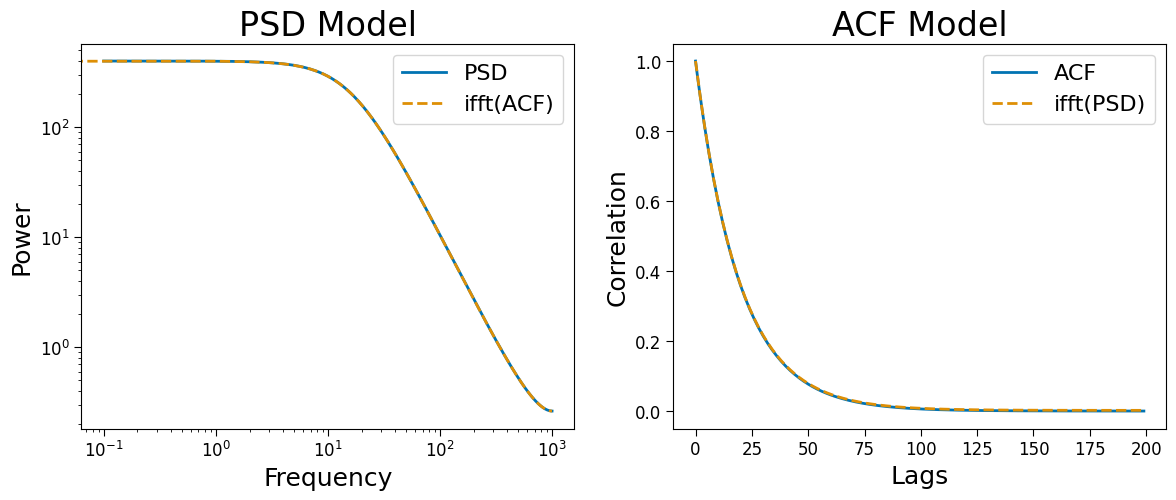

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5))

axes[0].loglog(freqs[1:], powers[1:], label='PSD')
axes[0].loglog(freqs_ifft, powers_ifft, ls='--', label='ifft(ACF)')

axes[1].plot(lags[:200], corrs[:200], label='ACF')
axes[1].plot(lags_ifft[:100], corrs_ifft[:100], ls='--', label='ifft(PSD)')

axes[0].set_title('PSD Model')
axes[1].set_title('ACF Model')

axes[0].set_ylabel('Power')
axes[0].set_xlabel('Frequency')

axes[1].set_ylabel('Correlation')
axes[1].set_xlabel('Lags')

axes[0].legend(fontsize=16)
axes[1].legend(fontsize=16);